In [6]:
import numpy as np 
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline,LSQUnivariateSpline

import matplotlib.pyplot as plt
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
def powerlaw(x,a,b): 
    return a*x**b

In [8]:
# 2020 Baseline sensitivity and discovery potential numbers 
Data = {}
Data['Baseline Sensitivity'] = {} 
Data['Baseline Sensitivity']['Livetime'] = np.array([0.0, 0.5, 1.0, 2.0, 5.0, 10.0])
Data['Baseline Sensitivity']['Halflife'] = np.array([1e-27,1.121, 2.128, 4.395, 8.499, 13.52])*1E27

Data['Baseline Discovery'] = {} 
Data['Baseline Discovery']['Livetime'] = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
Data['Baseline Discovery']['Halflife'] = np.array([1e-27, 0.318, 0.539, 0.714, 0.879, 0.99, 1.64, 2.74, 3.41, 4.13, 4.74, 5.48, 6.02, 6.56, 6.98, 7.40])*1E27
Data['Baseline Discovery']['Counts'] = np.array([0.0, 2.75, 3.25, 3.68, 3.98, 4.38, 5.24, 6.38, 7.71, 8.47, 9.27, 9.57, 10.18, 10.67, 11.28, 11.81])

In [9]:
# Spline fit to smooth out curves
xs = np.linspace(0,10,10000)

spl = LSQUnivariateSpline(x=Data['Baseline Sensitivity']['Livetime'], 
                          y=Data['Baseline Sensitivity']['Halflife'], 
                          t=Data['Baseline Sensitivity']['Livetime'][4:4], 
                          k=3)

spl2 = LSQUnivariateSpline(x=Data['Baseline Discovery']['Livetime'], 
                           y=Data['Baseline Discovery']['Halflife'], 
                           t=Data['Baseline Sensitivity']['Livetime'][1:2], 
                           k=3)

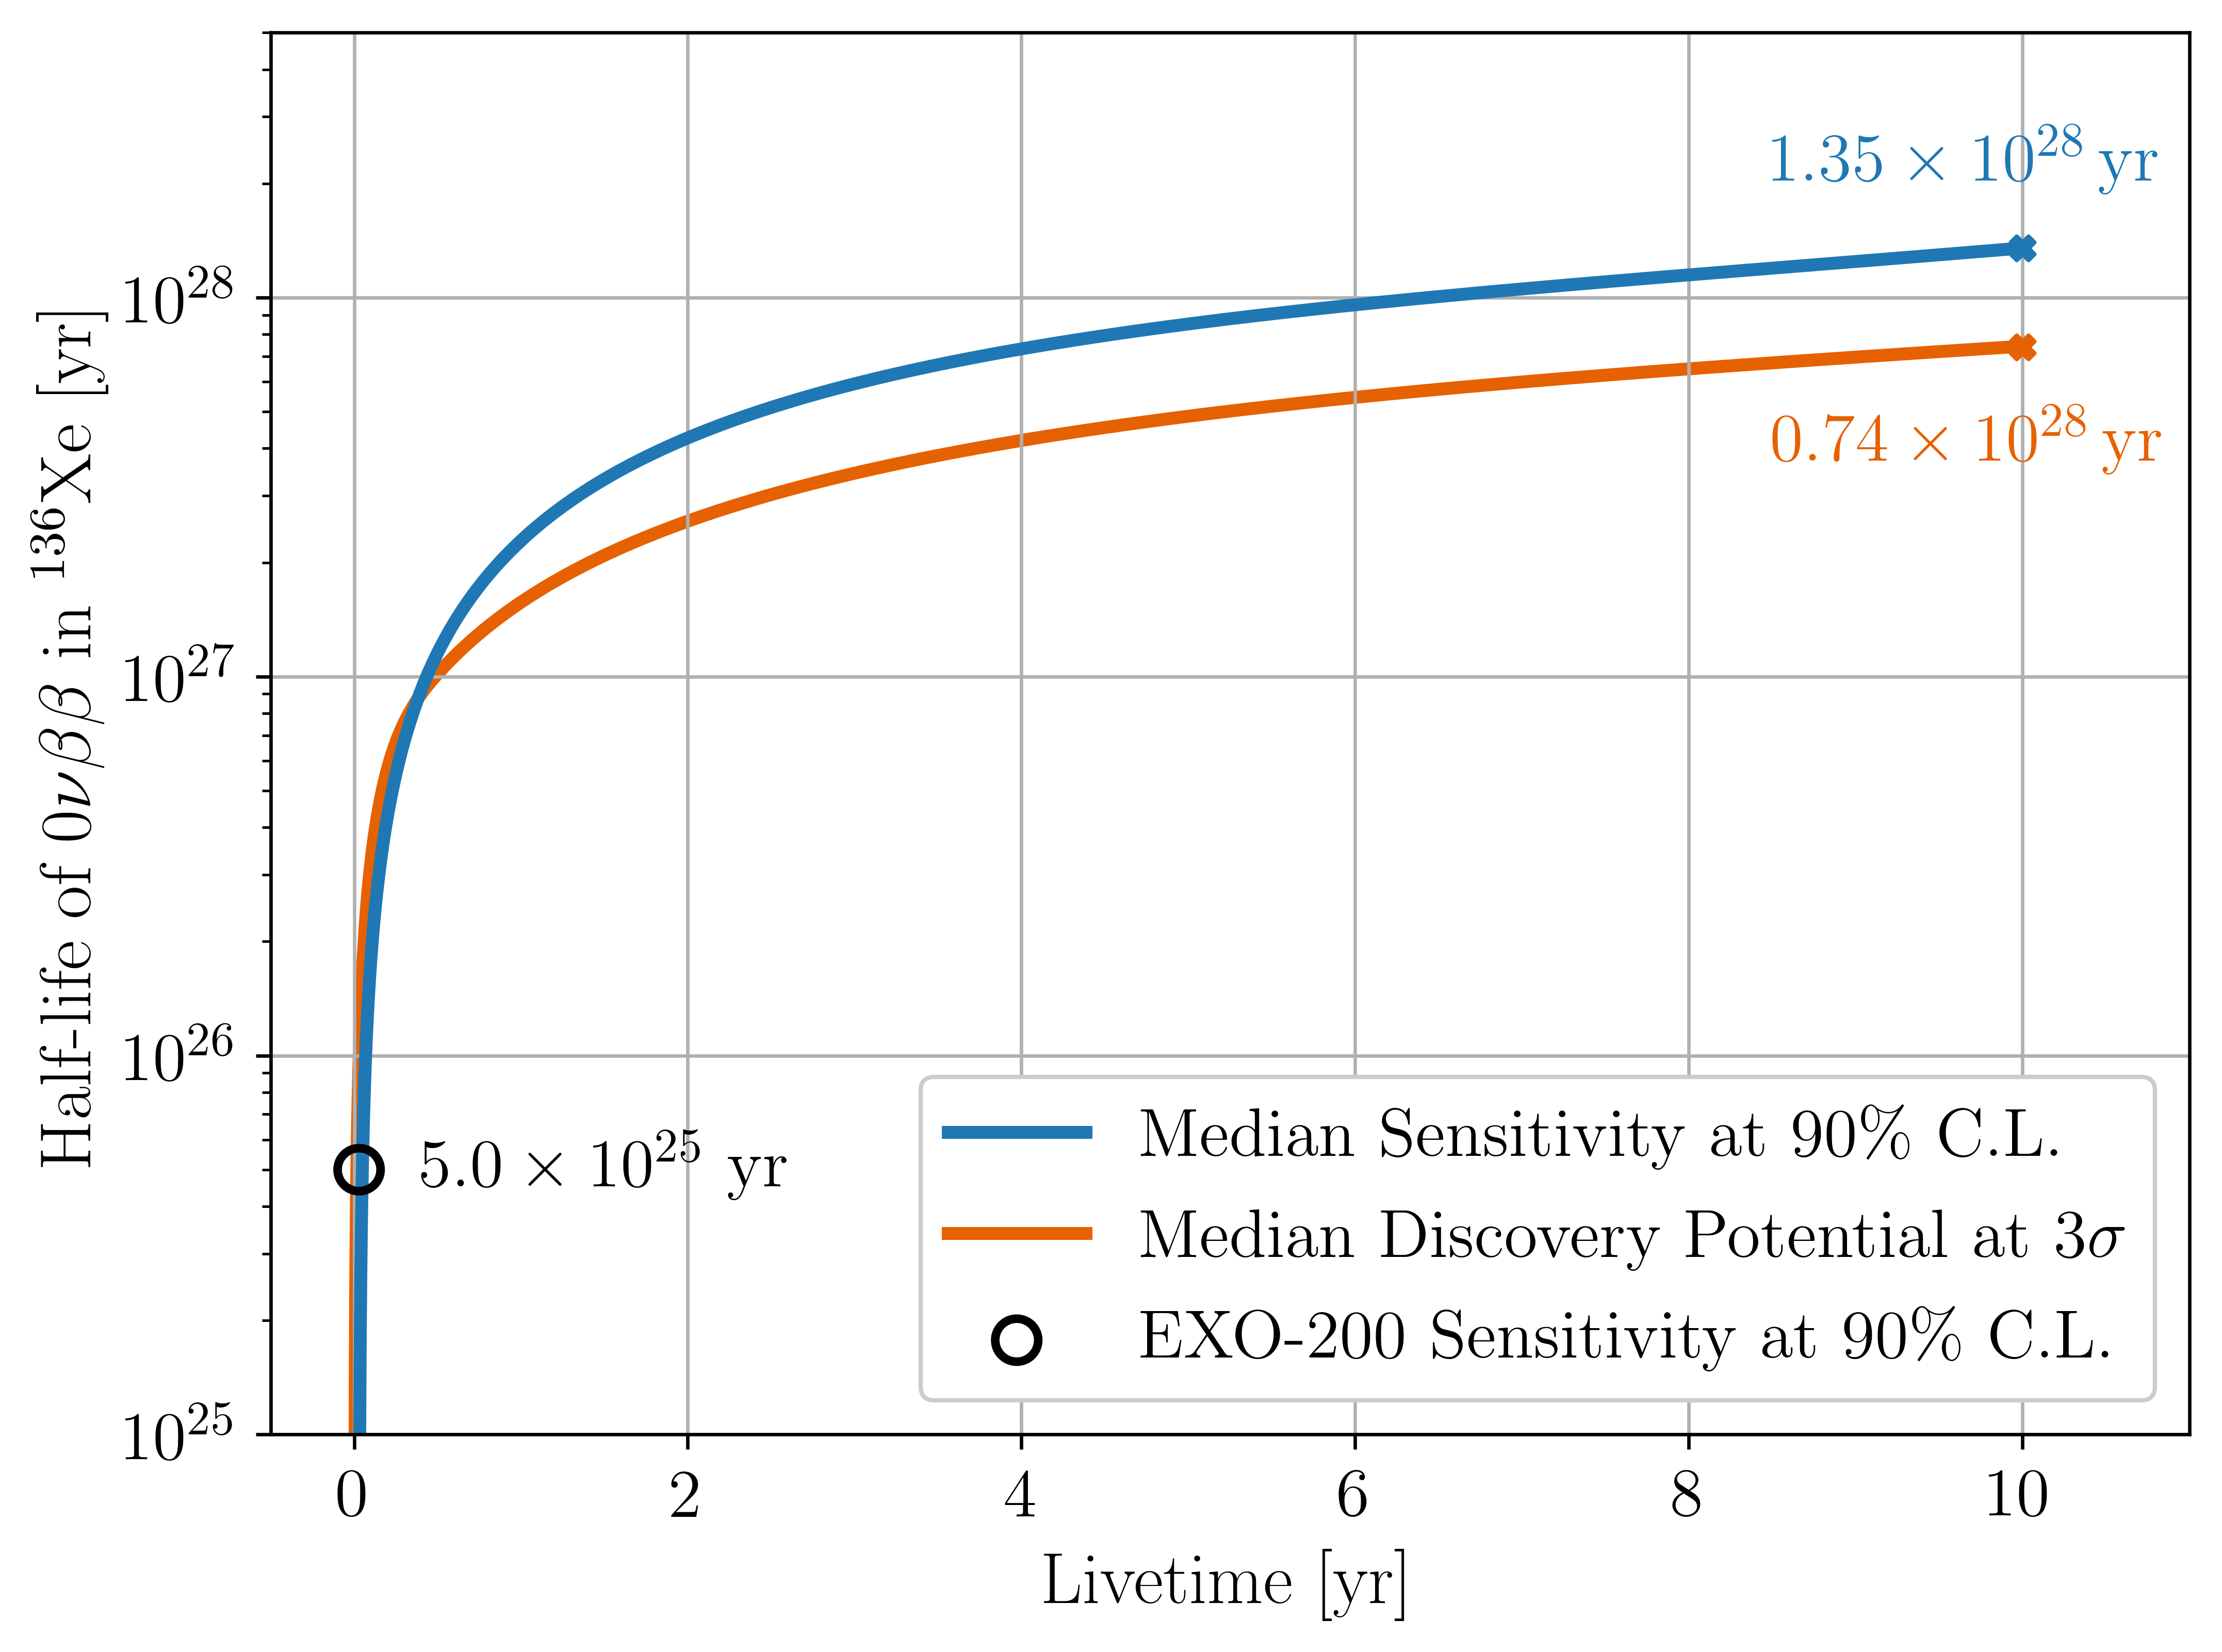

In [13]:
fig = plt.figure()
plt.xlabel('Livetime [yr]')
plt.ylabel('Half-life of $0\\nu\\beta\\beta$ in ${}^{136}\mathrm{Xe}$ [yr]')
plt.xlim(-0.5,11.0)
plt.ylim(1E25,5E28)
plt.yscale('log')
plt.grid()


# Scatter of individual results at different livetimes
# plt.scatter(x=Data['Baseline Sensitivity']['Livetime'], 
#             y=Data['Baseline Sensitivity']['Halflife'], 
#             color=colors[0], label='', s=30, marker='.')
# plt.scatter(x=Data['Baseline Discovery']['Livetime'], 
#             y=Data['Baseline Discovery']['Halflife'], 
#             label='', color=colors[1], s=30, marker='.')


# Plot spline interpolation
plt.plot(xs, spl(xs), 
        label='Median Sensitivity at 90\% C.L.', 
        color=colors[0], 
        linewidth=3,zorder=2)
plt.plot(xs, spl2(xs), 
        label='Median Discovery Potential at $3\sigma$', 
        color=colors[1],
        linewidth=3,zorder=1)


# Add marker for half-life after 10 years
plt.scatter(x=Data['Baseline Sensitivity']['Livetime'][-1], 
            y=Data['Baseline Sensitivity']['Halflife'][-1], 
            label='', marker='X', color=colors[0], s=30, zorder=10)
plt.scatter(x=Data['Baseline Discovery']['Livetime'][-1], 
            y=Data['Baseline Discovery']['Halflife'][-1], 
            label='', marker='X', color=colors[1], s=30, zorder=10)


# Add half-life after 10 years as text
sens_base = Data['Baseline Sensitivity']['Halflife'][-1]/1E28
sens_exp = np.floor(np.log10(Data['Baseline Sensitivity']['Halflife'][-1])).astype(int)
dp_base = Data['Baseline Discovery']['Halflife'][-1]/1E28
dp_exp = np.floor(np.log10(Data['Baseline Discovery']['Halflife'][-1])).astype(int)+1

plt.text(x=8.5, y=Data['Baseline Sensitivity']['Halflife'][-1]*1.5, 
         s='${:1.2f} \\times 10^{{{}}}\, \mathrm{{yr}}$'.format(sens_base, sens_exp), 
         color=colors[0], fontsize=16)
plt.text(x=8.5, y=Data['Baseline Discovery']['Halflife'][-1]/2.0, 
         s='${:1.2f} \\times 10^{{{}}}\, \mathrm{{yr}}$'.format(dp_base, dp_exp), 
         color=colors[1], fontsize=16)


# Add EXO-200 reference
plt.scatter(0.03, 5.0e25, 
         marker='o', s=100, lw=2.0, facecolor='none', edgecolor='k',
         label='EXO-200 Sensitivity at 90\% C.L.', zorder=10)
plt.text(x=0.4, y=4.5e25, s='$5.0\\times10^{25}$ yr', fontsize=16)


plt.legend(loc='lower right',framealpha=1.)
plt.savefig('sens_dp_vs_livetime.png')